In [ ]:
Problem statement: Determine why patients did not come for the second appointment 
for the zip code 81137 ?

In [1]:
import pandas as pd 
import numpy as np 

In [26]:
# Data Upload 
df = pd.read_csv('Course-Challenge-Dataset---Scenario-2.csv')
df

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes
...,...,...,...,...,...,...,...,...,...
94,909853,T,Widowed,Allison,CO,81137,78,Extraction,No
95,915871,F,Partnership,Allison,CO,81137,36,Emergency Surgery,Yes
96,923490,M,Single,Allison,CO,81137,38,Extraction,Yes
97,934101,F,Single,Allison,CO,81137,39,Emergency Surgery,Yes


In [27]:
# Value_counts of gender 
df.Gender.value_counts()

F     49
M     42
T      4
NC     3
P      1
Name: Gender, dtype: int64

In [28]:
# Checking for null Values
df.isnull().any()

Patient ID             False
Gender                 False
Marital Status         False
City                   False
State                  False
Zip Code               False
Age                    False
Procedure              False
Follow-up Attended?    False
dtype: bool

In [29]:
# Creating bins of age
df['Bins'] = pd.cut(df.Age,
       [0,60,120], labels=["Young", "Senior Citizen"])

In [30]:
# Seeing the number of states
df.State.nunique()

1

In [31]:
# Understnading the numeric data  
df.describe()

,Patient ID,Zip Code,Age
count,99.000000,99.0,99.000000
mean,297007.989899,81137.0,62.818182
std,304907.283539,0.0,21.413025
min,11234.000000,81137.0,24.000000
25%,52802.000000,81137.0,43.000000
50%,98812.000000,81137.0,68.000000
75%,534712.500000,81137.0,81.000000
max,936597.000000,81137.0,102.000000


In [32]:
# Patient who did not show up on follw up 
df1 = df[df['Follow-up Attended?']=='No']

In [33]:
# Grouping the data based on Age 
sencitigrp = df1[df1.Bins == 'Senior Citizen']
sencitigrp

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?,Bins
1,15620,F,Single,Allison,CO,81137,94,Extraction,No,Senior Citizen
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No,Senior Citizen
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No,Senior Citizen
6,29489,M,Married,Allison,CO,81137,85,Crown,No,Senior Citizen
7,34918,T,Widowed,Allison,CO,81137,81,Extraction,No,Senior Citizen
9,35329,M,Widowed,Allison,CO,81137,86,Emergency Surgery,No,Senior Citizen
10,39606,F,Married,Allison,CO,81137,69,Extraction,No,Senior Citizen
12,41371,F,Married,Allison,CO,81137,82,Crown,No,Senior Citizen
15,43891,F,Widowed,Allison,CO,81137,78,Extraction,No,Senior Citizen
18,47060,F,Widowed,Allison,CO,81137,90,Crown,No,Senior Citizen


In [34]:
# Grouping the data based on age 
younggrp = df1[df1.Bins == 'Young']
younggrp

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?,Bins
11,40614,NC,Married,Allison,CO,81137,49,Crown,No,Young
16,44606,F,Divorced,Southern Ute,CO,81137,51,Crown,No,Young
21,49035,M,Single,Southern Ute,CO,81137,52,Extraction,No,Young
24,52494,F,Divorced,Allison,CO,81137,47,Extraction,No,Young
25,53110,M,Single,Southern Ute,CO,81137,43,Emergency Surgery,No,Young
39,75025,F,Single,Southern Ute,CO,81137,30,Crown,No,Young
53,152926,F,Divorced,Southern Ute,CO,81137,34,Extraction,No,Young
81,709760,F,Married,Allison,CO,81137,37,Extraction,No,Young


In [35]:
df2 = df[df['Follow-up Attended?']=='Yes']
df2

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?,Bins
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes,Senior Citizen
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes,Young
5,26513,F,Partnership,Allison,CO,81137,43,Emergency Surgery,Yes,Young
8,34952,F,Single,Allison,CO,81137,35,Implant,Yes,Young
13,42305,M,Married,Southern Ute,CO,81137,57,Crown,Yes,Young
14,43854,F,Married,Allison,CO,81137,72,Emergency Surgery,Yes,Senior Citizen
17,46218,M,Single,Allison,CO,81137,72,Extraction,Yes,Senior Citizen
26,55725,F,Partnership,Southern Ute,CO,81137,34,Emergency Surgery,Yes,Young
27,56884,M,Single,Southern Ute,CO,81137,38,Crown,Yes,Young
28,58912,F,Divorced,Southern Ute,CO,81137,42,Extraction,Yes,Young


In [36]:
#Group3  senior citizen who followed up 
sencitigrpfollowup = df2[df2.Bins == 'Senior Citizen']
sencitigrpfollowup

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?,Bins
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes,Senior Citizen
14,43854,F,Married,Allison,CO,81137,72,Emergency Surgery,Yes,Senior Citizen
17,46218,M,Single,Allison,CO,81137,72,Extraction,Yes,Senior Citizen
33,68643,F,Divorced,Allison,CO,81137,68,Extraction,Yes,Senior Citizen
48,98249,M,Single,Allison,CO,81137,62,Crown,Yes,Senior Citizen
56,203722,M,Widowed,Allison,CO,81137,84,Emergency Surgery,Yes,Senior Citizen
59,252754,F,Married,Allison,CO,81137,81,Crown,Yes,Senior Citizen
62,336825,F,Divorced,Allison,CO,81137,78,Extraction,Yes,Senior Citizen
64,386755,F,Single,Southern Ute,CO,81137,63,Extraction,Yes,Senior Citizen
65,387202,M,Widowed,Allison,CO,81137,97,Implant,Yes,Senior Citizen


In [38]:
# Young who followed up 
younggrpfollowup = df2[df2.Bins == 'Young']
younggrpfollowup

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?,Bins
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes,Young
5,26513,F,Partnership,Allison,CO,81137,43,Emergency Surgery,Yes,Young
8,34952,F,Single,Allison,CO,81137,35,Implant,Yes,Young
13,42305,M,Married,Southern Ute,CO,81137,57,Crown,Yes,Young
26,55725,F,Partnership,Southern Ute,CO,81137,34,Emergency Surgery,Yes,Young
27,56884,M,Single,Southern Ute,CO,81137,38,Crown,Yes,Young
28,58912,F,Divorced,Southern Ute,CO,81137,42,Extraction,Yes,Young
34,69479,F,Divorced,Allison,CO,81137,25,Extraction,Yes,Young
36,72264,F,Divorced,Southern Ute,CO,81137,47,Extraction,Yes,Young
41,76242,F,Married,Southern Ute,CO,81137,32,Extraction,Yes,Young


In [ ]:
Data Analysis 

How many senior citizen out of total senior citizen did not attend the follow up ? 
Distribution of gender of the senior citizen ? 
There Marrital status ? 
what procedure was going on for them ? 
does city has role to play ? i mean the distance from facility to home ? 


Let's Dig into the data

In [52]:
persenciti = round((len(sencitigrp) + len(sencitigrpfollowup))*100/len(df),1)
persencitynotfollowed = round(len(sencitigrp)*100/(len(sencitigrp) + len(sencitigrpfollowup)),1)
persencityfollowed = round(100-persencitywhofollowed,1)
print('Out of total patients what is the % of the senior citizen is',persenciti)
print('Out of total senior citizen % who followed up is',persencityfollowed)
print('Out of total senior citizen % who did not follow up is',persencitynotfollowed)

Out of total patients what is the % of the senior citizen is 57.6
Out of total senior citizen % who followed up is 31.6
Out of total senior citizen % who did not follow up is 68.4


<AxesSubplot:ylabel='Percent'>

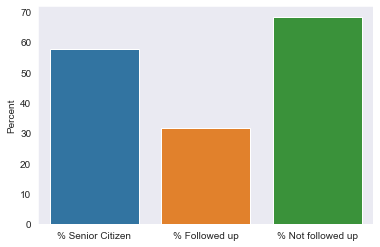

In [77]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')
perencitidf = pd.DataFrame({'Percent' :[persenciti,persencityfollowed,persencitynotfollowed]}, 
             index = ['% Senior Citizen','% Followed up','% Not followed up'])
sns.barplot(y='Percent', x = perencitidf.index ,data=perencitidf)

<AxesSubplot:ylabel='Patient ID'>

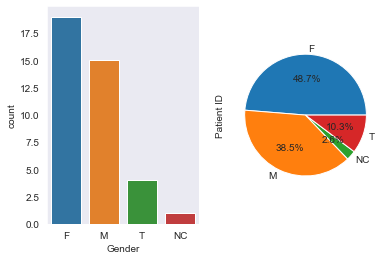

In [102]:
#---Let us analyze the senior citizen who didnot follow up ---
#distribution of gender 
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=sencitigrp)

plt.subplot(1,2,2)
piechartdf = sencitigrp.groupby(['Gender'])['Patient ID'].count()
piechartdf.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

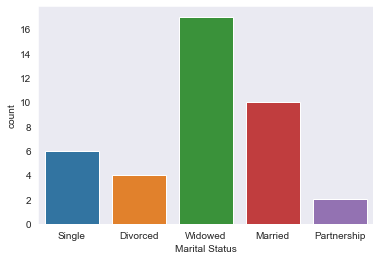

In [79]:
# Distribution of marital status of the senior citizen 
sns.countplot(x='Marital Status', data=sencitigrp)

<AxesSubplot:ylabel='Patient ID'>

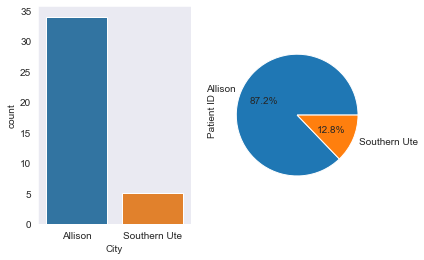

In [105]:
# Distribution of city wise

plt.subplot(1,2,1)
sns.countplot(x='City', data=sencitigrp)

plt.subplot(1,2,2)
piechartdf1 = sencitigrp.groupby(['City'])['Patient ID'].count()
piechartdf1.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Procedure', ylabel='count'>

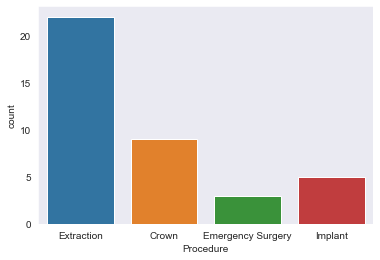

In [82]:
# Distribution of medical treatmen
sns.countplot(x='Procedure', data=sencitigrp)

In [ ]:

From the above analysis it can seen that mostly Allioson senior citizen did not show up for the follow-up
treatment. 50% woman did not show at follow up treatment and  Window marital status group also is the
highest amoung marital status group who did not show up for the treatment.
